#  Titanic survived Project 

# Project Description 

The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster.  

Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not.

- `PassengerId`: A unique identifier assigned to each passenger.
- `Survived`: Indicates whether a passenger survived the sinking of the Titanic. (0 = No, 1 = Yes)
- `Pclass`: The passenger's ticket class. (1 = 1st class, 2 = 2nd class, 3 = 3rd class)
- `Name`: The name of the passenger.
- `Sex`: The gender of the passenger. (Male or Female)
- `Age`: The age of the passenger in years.
- `SibSp`: The number of siblings or spouses the passenger had aboard the Titanic.
- `Parch`: The number of parents or children the passenger had aboard the Titanic.
- `Ticket`: The ticket number.
- `Fare`: The fare or price paid for the ticket.
- `Cabin`: The cabin number.
- `Embarked`: The port of embarkation for the passenger. (C = Cherbourg, Q = Queenstown, S = Southampton)



# Importing dependencies

In [55]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# setting up the style of the figures
sns.set_style('darkgrid')
plt.rcParams['font.size']=15
plt.rcParams['figure.figsize']=(11,7)
plt.rcParams['figure.facecolor']='#FFE544'

In [3]:
# Loading dataset
data_ = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')
# checking columnname
data_.columns.to_list()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [4]:
# creating copy of the dataset 

data = data_.copy()

# Understanding the Data

In [5]:
print('The dataset has {} Rows and {} Columns.'.format(data.shape[0], data.shape[1]))

The dataset has 891 Rows and 12 Columns.


In [6]:
#checking 5 sample 
data.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
612,613,1,3,"Murphy, Miss. Margaret Jane",female,NaN,1,0,367230,15.500,NaN,Q
284,285,0,1,"Smith, Mr. Richard William",male,NaN,0,0,113056,26.000,A19,S
815,816,0,1,"Fry, Mr. Richard",male,NaN,0,0,112058,0.000,B102,S
107,108,1,3,"Moss, Mr. Albert Johan",male,NaN,0,0,312991,7.775,NaN,S
141,142,1,3,"Nysten, Miss. Anna Sofia",female,22.0,0,0,347081,7.750,NaN,S


In [7]:
# Dropping the PassengerID cause it has no relation with Survived
data.drop('PassengerId',axis=1,inplace=True)

In [8]:
# checking the basic information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


* Observation = data have float64(2), int64(4), object(5) columns

In [9]:
# checking null values
data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

* Age ,Cabin and ,Embarked have null values 

In [10]:
# checking the duplicates
data.duplicated().sum()

0

* There is no duplicate values

<AxesSubplot:>

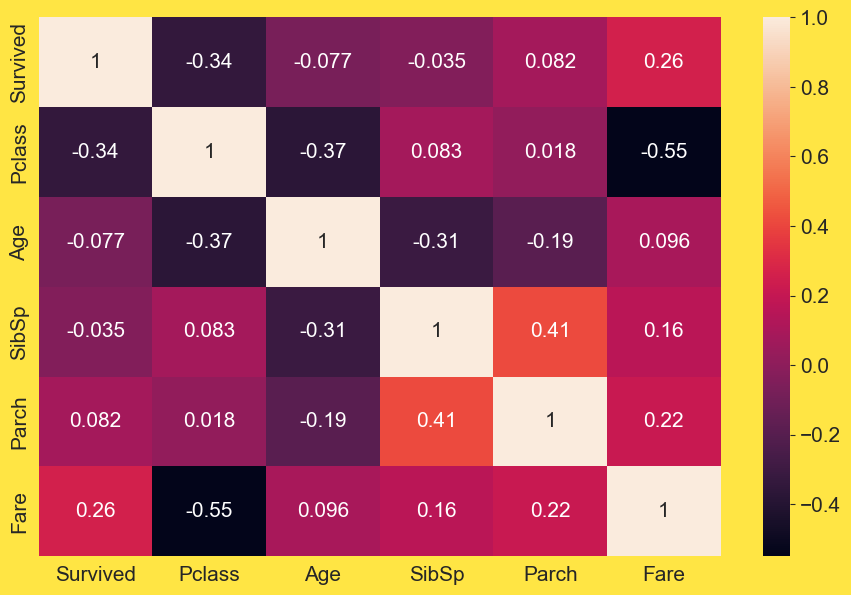

In [11]:
# checking the correlation 
sns.heatmap(data.corr(),annot=True)

* Pclass have high negative correlation with Fare and sibsp have high positive relation with parch .

<AxesSubplot:xlabel='Age', ylabel='Count'>

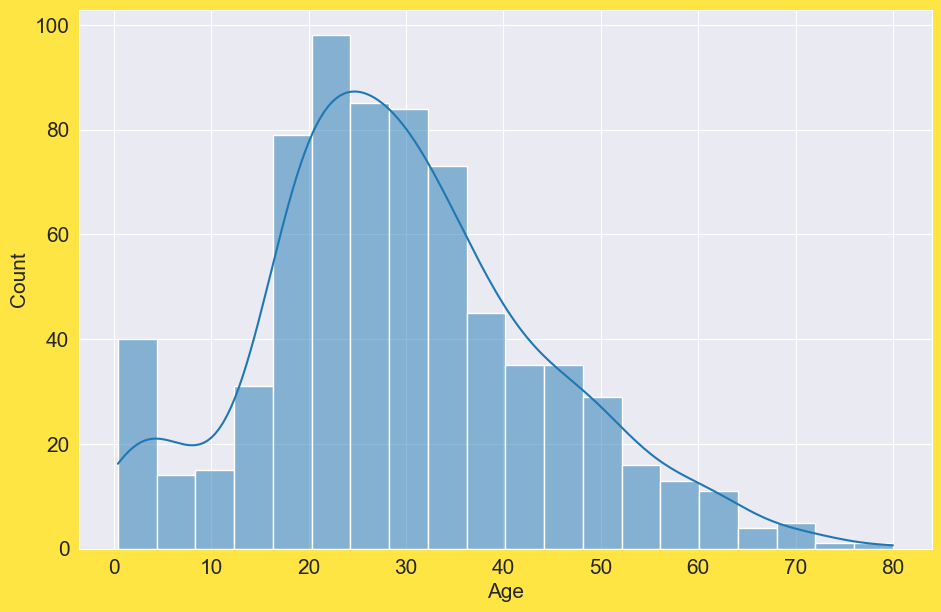

In [12]:
# checking age 
sns.histplot(data.Age,kde=True)

* The age column is skewed towards right so we will use median to fill na values.

In [13]:
# filling the null values of the Age
data.Age.fillna(data.Age.median(),inplace=True)

In [14]:
# removing the cabin columns cause the more the 70% values of the cabin is missing
data.drop('Cabin',axis=1,inplace=True)

In [15]:
# filling the null values of the Embarked column using the mode because the Embarked is a categorical column 
data.Embarked.fillna(data.Embarked.mode(),inplace=True)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [17]:
data.describe(include=['object']).T

,count,unique,top,freq
Name,891,891,"Braund, Mr. Owen Harris",1
Sex,891,2,male,577
Ticket,891,681,347082,7
Embarked,889,3,S,644


* Name and Ticket have high cardinality. I will not consider them for analysis.


In [18]:
# dropping name and ticket
data.drop(['Name','Ticket'],axis=1,inplace=True)


In [19]:
# creating a new column family size  
data['family_size'] = data['SibSp'] + data['Parch'] + 1


In [20]:
# family_type
# 1 -> alone
# 2-4 -> small
# >5 -> large

def transform_family_size(num):

  if num == 1:
    return 'alone'
  elif num>1 and num <5:
    return "small"
  else:
    return "large"

In [21]:
# creating a new column family type 

data['family_type'] = data['family_size'].apply(transform_family_size)

In [22]:
pd.crosstab(data['Survived'],data['family_type'],normalize='columns')*100

family_type,alone,large,small
Survived,,,
0,69.646182,83.870968,42.123288
1,30.353818,16.129032,57.876712


* now we can clearly see that the small family have high chance to survive 

In [23]:
# drop sibSp and parch because i created a new column family size 
data.drop(['SibSp','Parch'],axis=1,inplace=True)

#  Data visualization 


<AxesSubplot:>

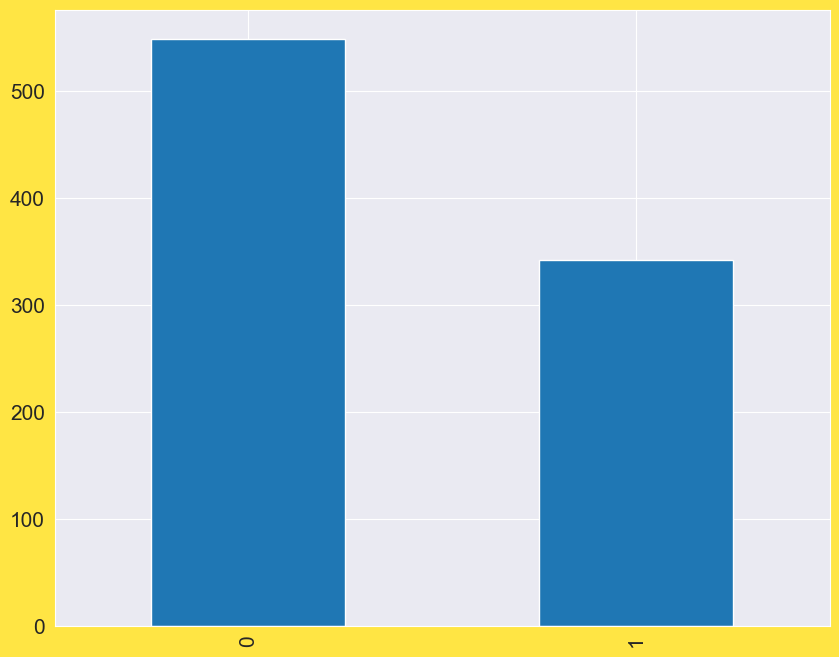

In [24]:
plt.figure(figsize=(10,8))
data.Survived.value_counts().plot(kind='bar')

### Observation:
Most people did not survive.
Target column in imbalanced, we need to balance it

In [25]:
def cat_plot(feature):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.countplot(x=feature,data=data)
    
    plt.subplot(1,2,2)
    
    sns.countplot(x='Survived',hue=feature,data=data)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    object 
 3   Age          891 non-null    float64
 4   Fare         891 non-null    float64
 5   Embarked     889 non-null    object 
 6   family_size  891 non-null    int64  
 7   family_type  891 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 55.8+ KB


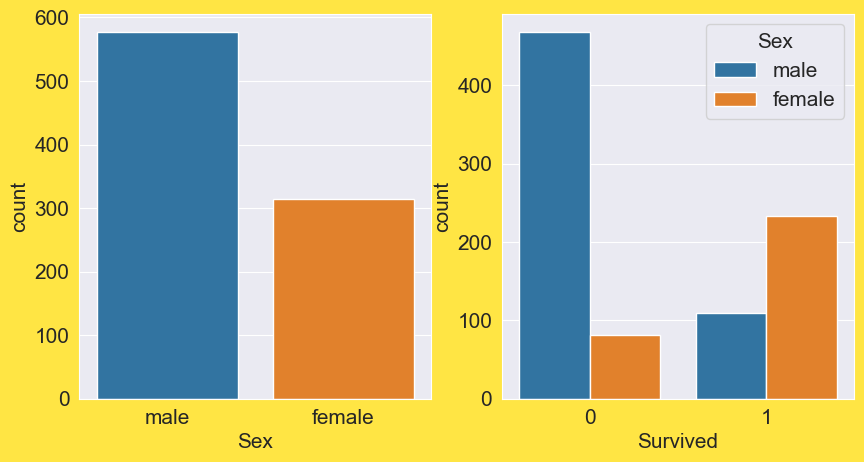

In [27]:
cat_plot('Sex')

# observation 
* Male are more in number as compare to the female .
* Female have high probability to survive as compare to the men.

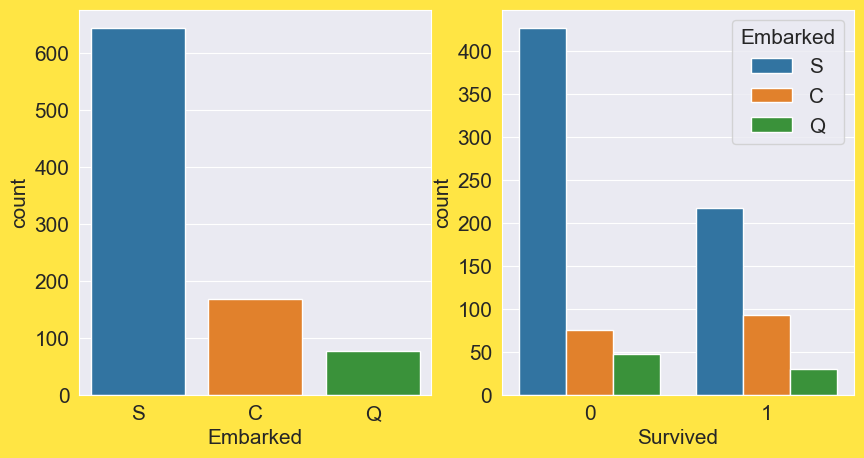

In [28]:
cat_plot('Embarked')

# observation
* Most of the people are from  Southampton then Cherbourg And then Queenstown . Maybe the reason behind is Southampton is the first station of the ship.
* Most of the people  who survived are from  Southampton then Cherbourg And then Queenstown . 

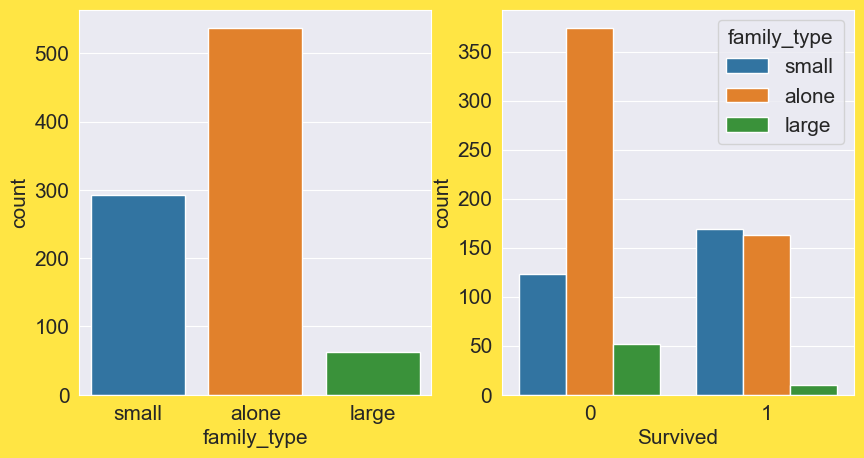

In [29]:
cat_plot('family_type')

# observation
* People who are alone are more in frequency .and the chance of the survival of the small family is the high and large family have low survival rate.And People who are alone are high chance to not survive

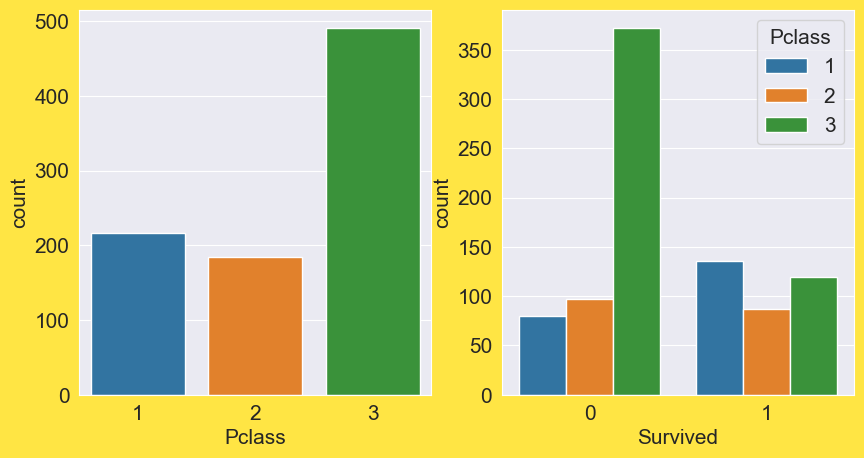

In [30]:
cat_plot('Pclass')
    
    

# observation
* We can clearly, see that Passengers of Pclass 1 were given a very high priority while rescue. Even though the the number of passengers in Pclass 3 were a lot higher, still the number of survival from Pclass 3 is very low, somewhere around 25%.

* For Pclass 1 % Survived is around 63% while for pclass2 is around 48%. In Conclusion money and status matters. Such a materialistic world.


 ## Lets Dive in little bit more and check for other interesting observations. Lets check survival rate with Sex and Pclass Together.


In [31]:
pd.crosstab([data.Sex,data.Survived],data.Pclass, margins= True).style.background_gradient(cmap='summer_r')

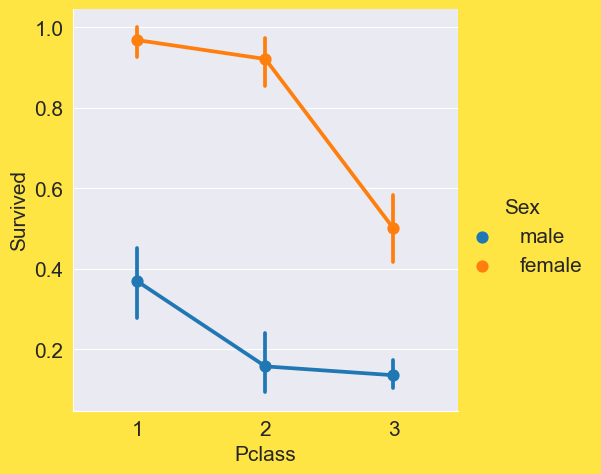

In [32]:
sns.factorplot('Pclass','Survived',hue='Sex',data=data)
plt.show()

# Observation :-
* Looking at the CrossTab and the Factorplot, we can easily infer that survival for Women from Pclass 1 is about 95-96%, as only 3 out of 94 Women from Pclass1 died.
* It is evident (from CrossTab and the Factorplot) that irrespective of pclass, women were given first priority while rescue. Even Men from Pclass1 have a very low survival rate.

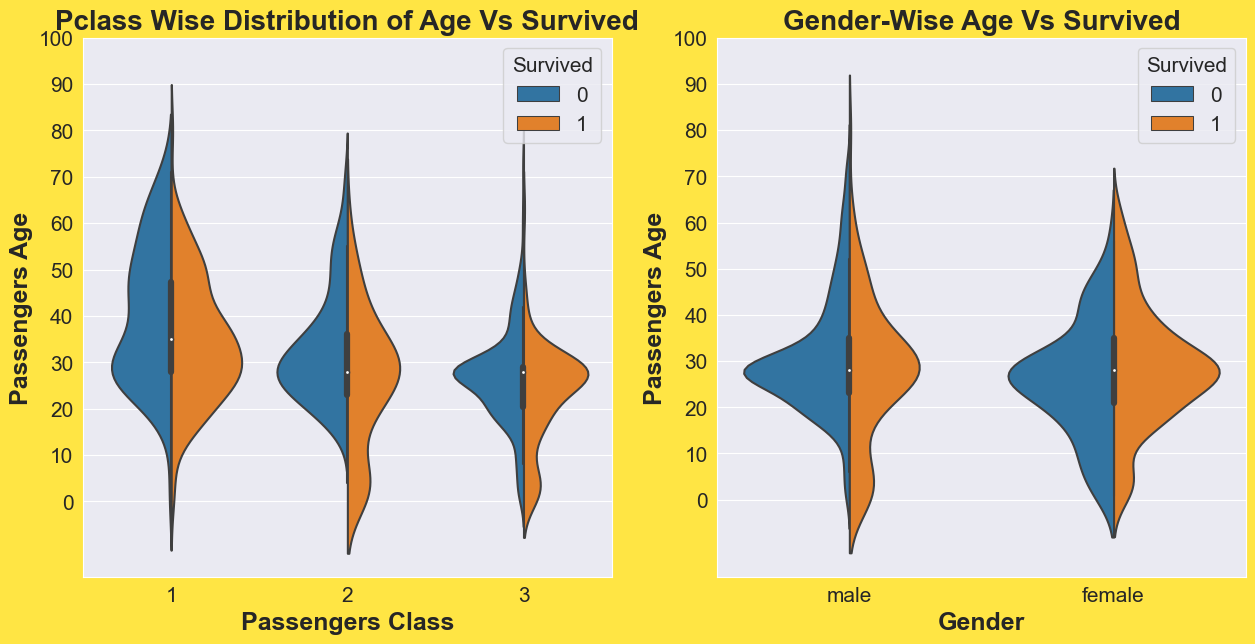

In [33]:
f,ax=plt.subplots(1,2,figsize=(15,7))
sns.violinplot('Pclass','Age', hue='Survived', data=data, split=True, ax=ax[0])
ax[0].set_title('Pclass Wise Distribution of Age Vs Survived',fontsize= 20, fontweight='bold')
ax[0].set_yticks(range(0,110,10))
ax[0].set_ylabel('Passengers Age',fontsize= 18, fontweight='bold')
ax[0].set_xlabel('Passengers Class', fontsize= 18, fontweight='bold')
sns.violinplot('Sex','Age', hue='Survived',data=data, split= True, ax=ax[1])
ax[1].set_title('Gender-Wise Age Vs Survived',fontsize= 20, fontweight='bold')
ax[1].set_yticks(range(0,110,10))
ax[1].set_ylabel('Passengers Age',fontsize= 18, fontweight='bold')
ax[1].set_xlabel('Gender', fontsize= 18, fontweight='bold')
plt.show()

## Observation :-
The number of children increases with Pclass and the survival ratee for passenengers below age 10 looks to be good irrespective of the Pclass.
Survival chances for Passenegers aged 20-50 from Pclass 1 is high and even better for women.
For males, the survival chances decreases with increase in age.

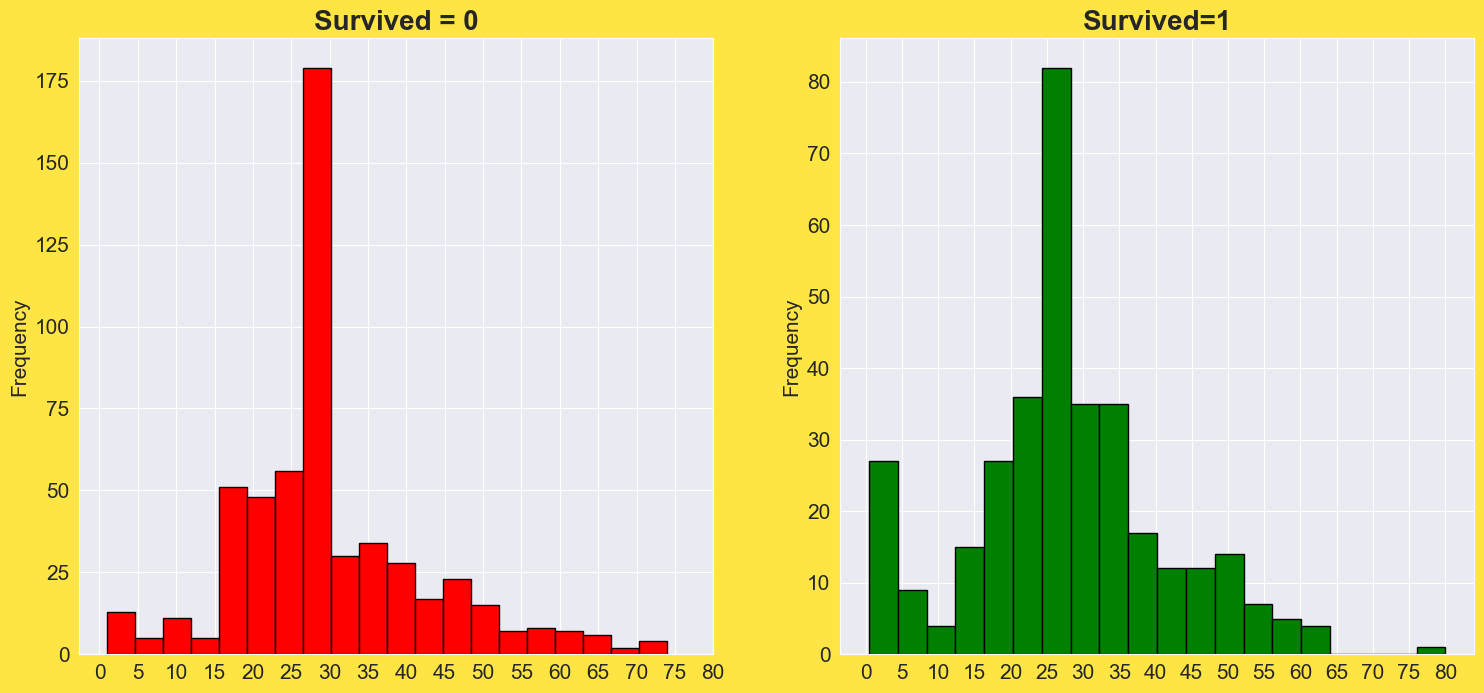

In [34]:
# checking Age and survived columns together
f,ax=plt.subplots(1,2,figsize=(18,8))
data[data['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived = 0',fontsize= 20, fontweight='bold')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
data[data['Survived']==1].Age.plot.hist(ax=ax[1],bins=20,edgecolor='black',color='green')
ax[1].set_title('Survived=1',fontsize= 20, fontweight='bold')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

# Observation :-
The Toddlers(age<5) were saved in large numbers. Possibliy, Women and Child first policy employs while rescue operation employed.
The oldest Passenger was saved (80 years).
Maximum number of deaths were in age group of 30-40. 

# Analysis Embarked vs Survival

In [35]:
pd.crosstab([data.Embarked,data.Pclass],[data.Sex,data.Survived],margins=True).style.background_gradient(cmap='Accent_r')

# Chances for Survival by Port of Embarkation

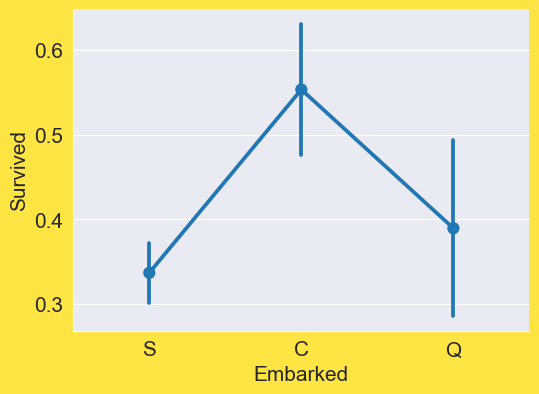

In [36]:
sns.factorplot('Embarked','Survived',data=data)
fig=plt.gcf()
fig.set_size_inches(6,4)
plt.show()

* The chances for survival for port C is highest around 0.55 while it is lowest for S.

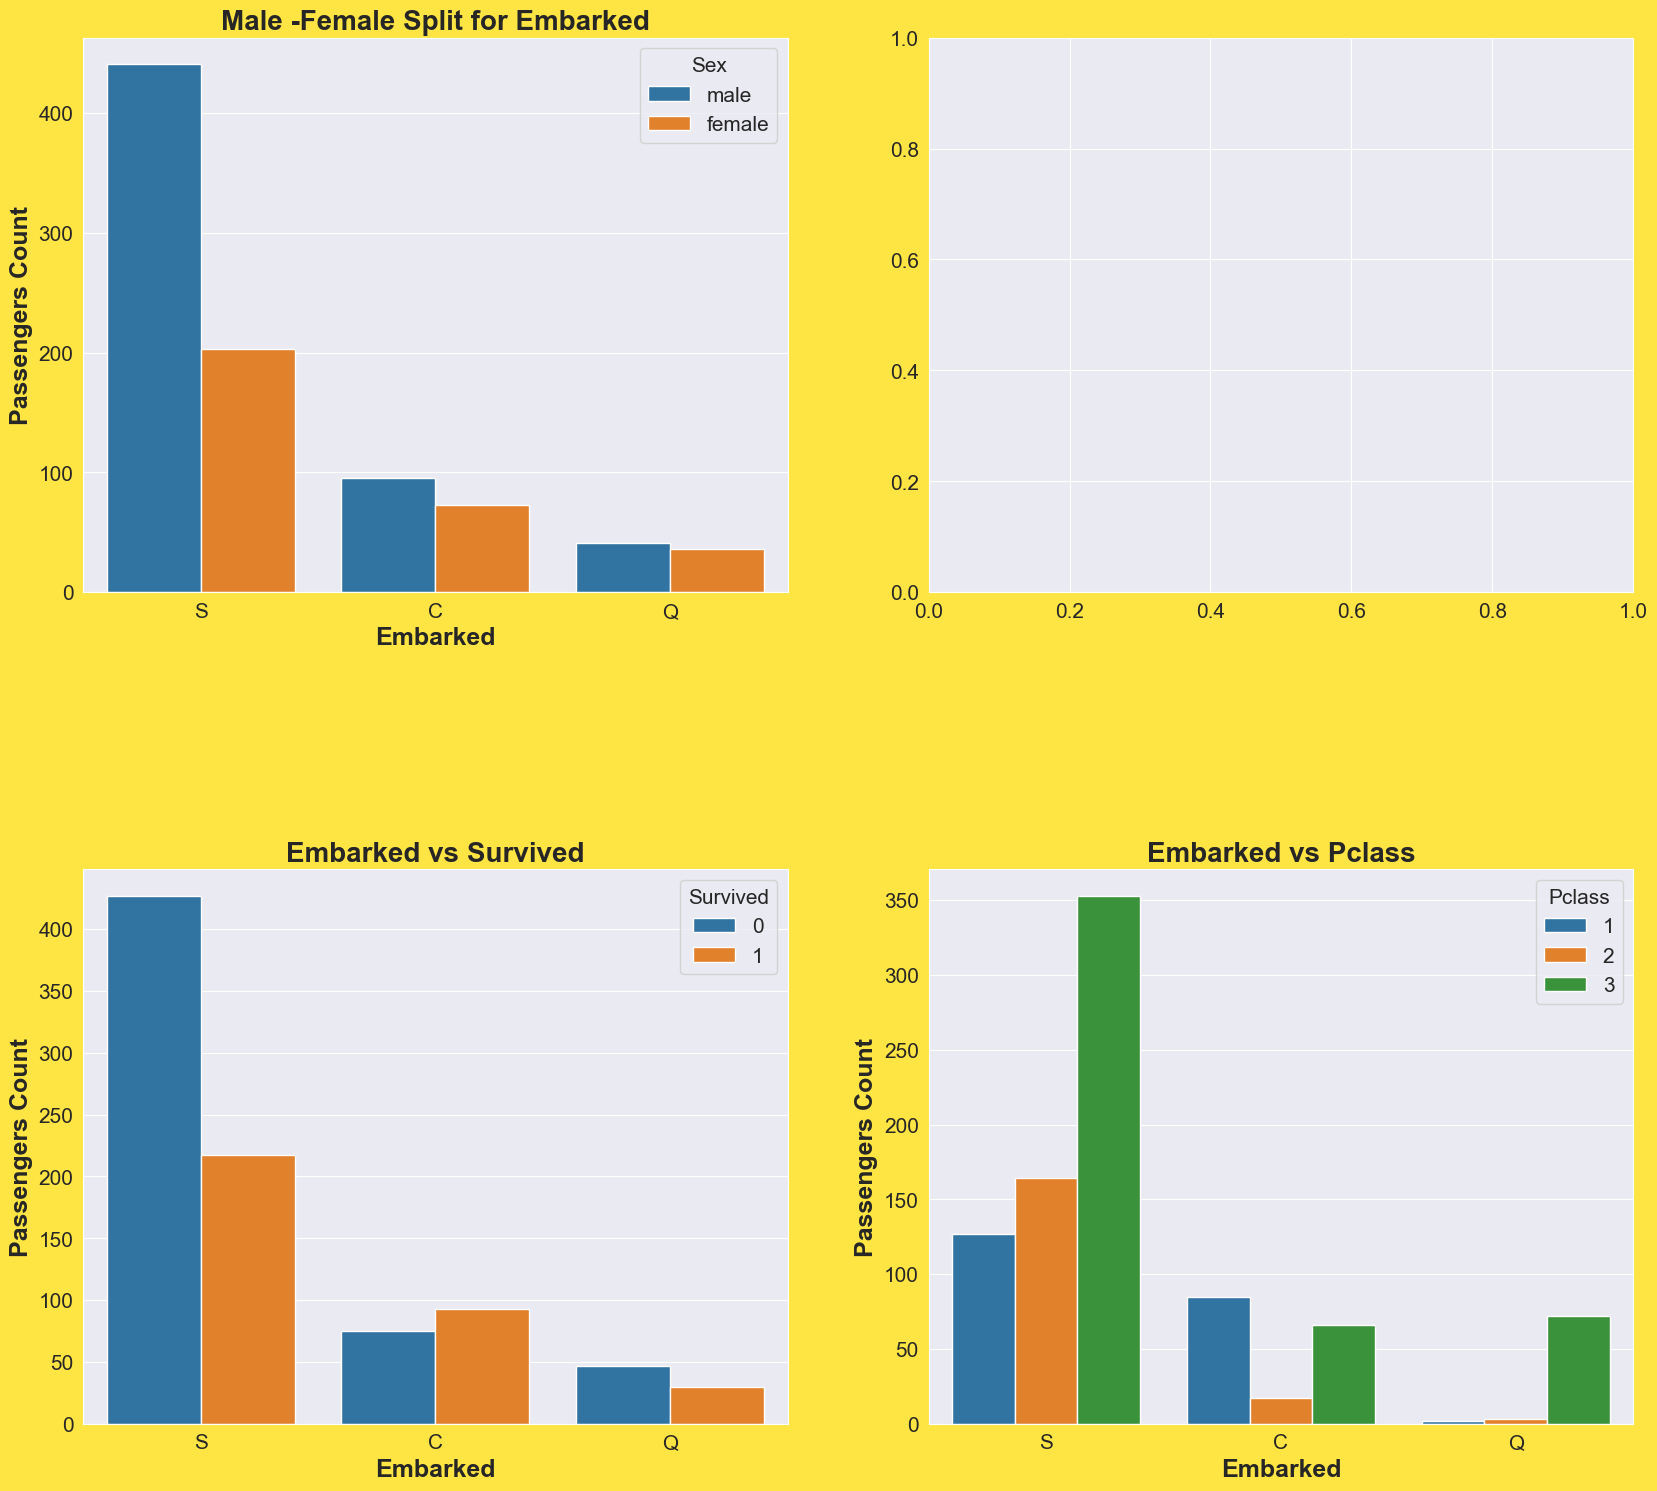

In [37]:
f,ax=plt.subplots(2,2,figsize=(20,18))
sns.countplot('Embarked',hue='Sex',data=data,ax=ax[0,0])
ax[0,0].set_title('Male -Female Split for Embarked',fontsize= 20, fontweight='bold')
ax[0,0].set_ylabel('Passengers Count',fontsize= 18, fontweight='bold')
ax[0,0].set_xlabel('Embarked', fontsize= 18, fontweight='bold')

sns.countplot('Embarked',hue="Survived" ,data=data,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived',fontsize= 20, fontweight='bold')
ax[1,0].set_ylabel('Passengers Count',fontsize= 18, fontweight='bold')
ax[1,0].set_xlabel('Embarked', fontsize= 18, fontweight='bold')

sns.countplot('Embarked',hue='Pclass',data=data,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass',fontsize= 20, fontweight='bold')
ax[1,1].set_ylabel('Passengers Count',fontsize= 18, fontweight='bold')
ax[1,1].set_xlabel('Embarked', fontsize= 18, fontweight='bold')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

# Observation :-
The Passengers from C look to be lucky as as good proportion of them survived. The reason for this may be the rescue of all. the Pclass 1 and Pclass 2 Passengers.
The Embark S looks to the port from where majority of the rich people. Still the chances for survival is low here, that is because many passengers from Pclass 3 around 81% didn't survive.
Port Q had almost 95% of the passengers were from Pclass 3.

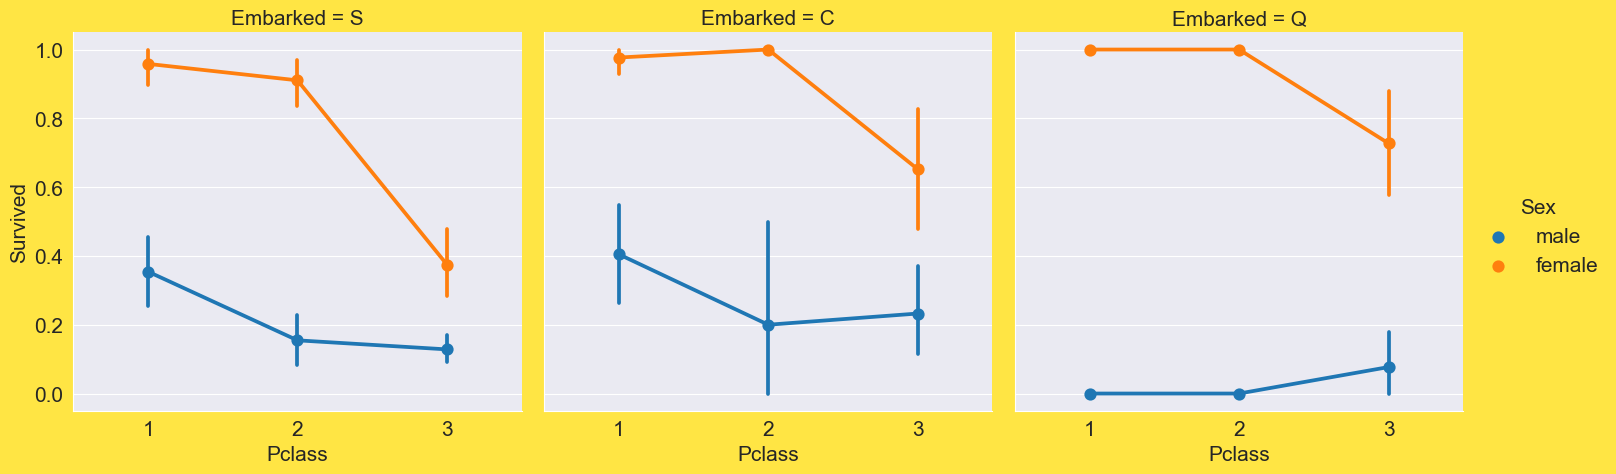

In [38]:
sns.factorplot('Pclass','Survived', hue='Sex', col='Embarked',data=data)
plt.show()

# Observation
The survival chances are almost 1 for women for Pclass 1 and Pclass 2 irrespective of the Pclass.
Port S looks to be very unlucky for Pclass 3 passengers as the survival rate for both men and women is very low.
Port Q looks to be unluckiest for Men, as almost all were from Pclass 3.

# Fare Vs Survival

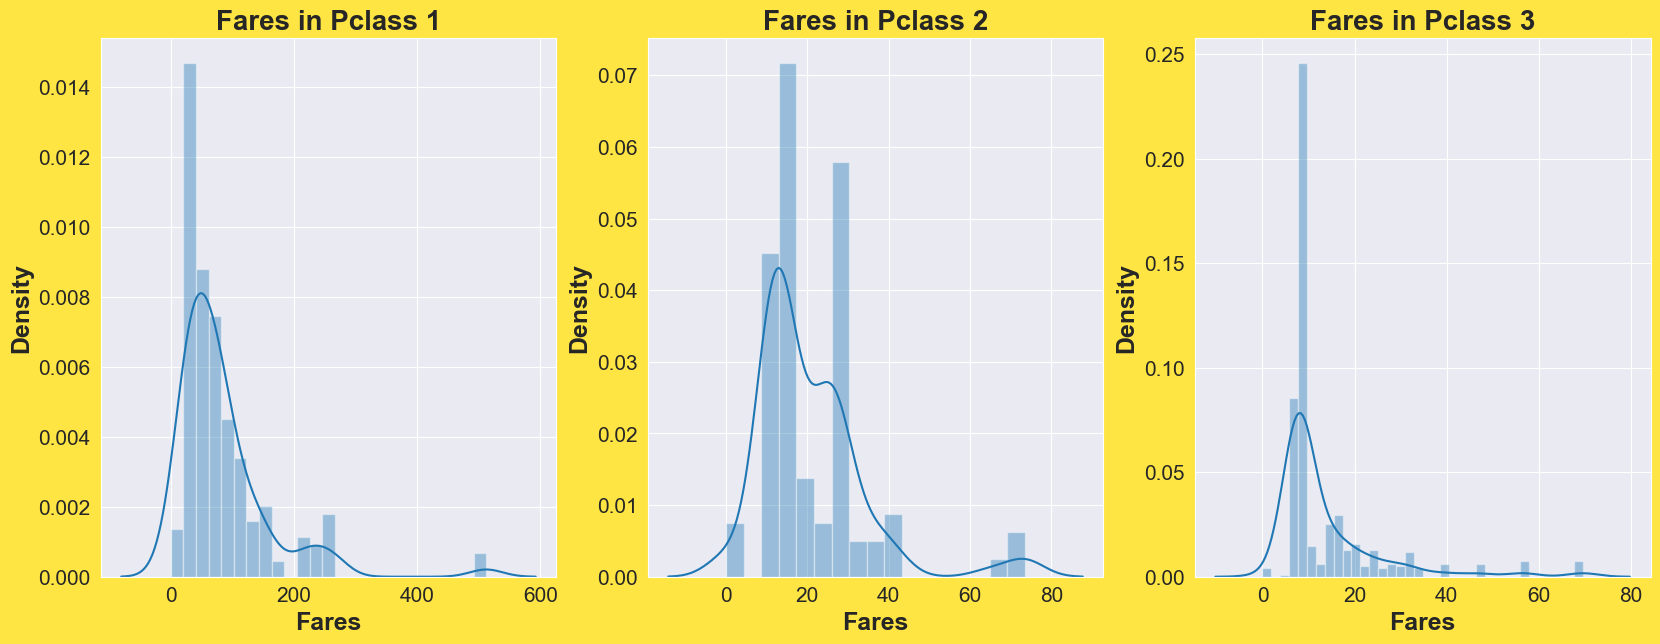

In [39]:
f,ax=plt.subplots(1,3,figsize=(20,7))
sns.distplot(data[data['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1',fontsize= 20, fontweight='bold')
ax[0].set_ylabel('Density',fontsize= 18, fontweight='bold')
ax[0].set_xlabel('Fares', fontsize= 18, fontweight='bold')

sns.distplot(data[data['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2',fontsize= 20, fontweight='bold')
ax[1].set_ylabel('Density',fontsize= 18, fontweight='bold')
ax[1].set_xlabel('Fares', fontsize= 18, fontweight='bold')

sns.distplot(data[data['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3',fontsize= 20, fontweight='bold')
ax[2].set_ylabel('Density',fontsize= 18, fontweight='bold')
ax[2].set_xlabel('Fares', fontsize= 18, fontweight='bold')
plt.show()


# Observation
There looks to be a large distribution in the fares of Passengers in Pclass1 and this distribution goes on decreasing as the standards reduces. As this is also Continous , we can convert into discrete values by using binning

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


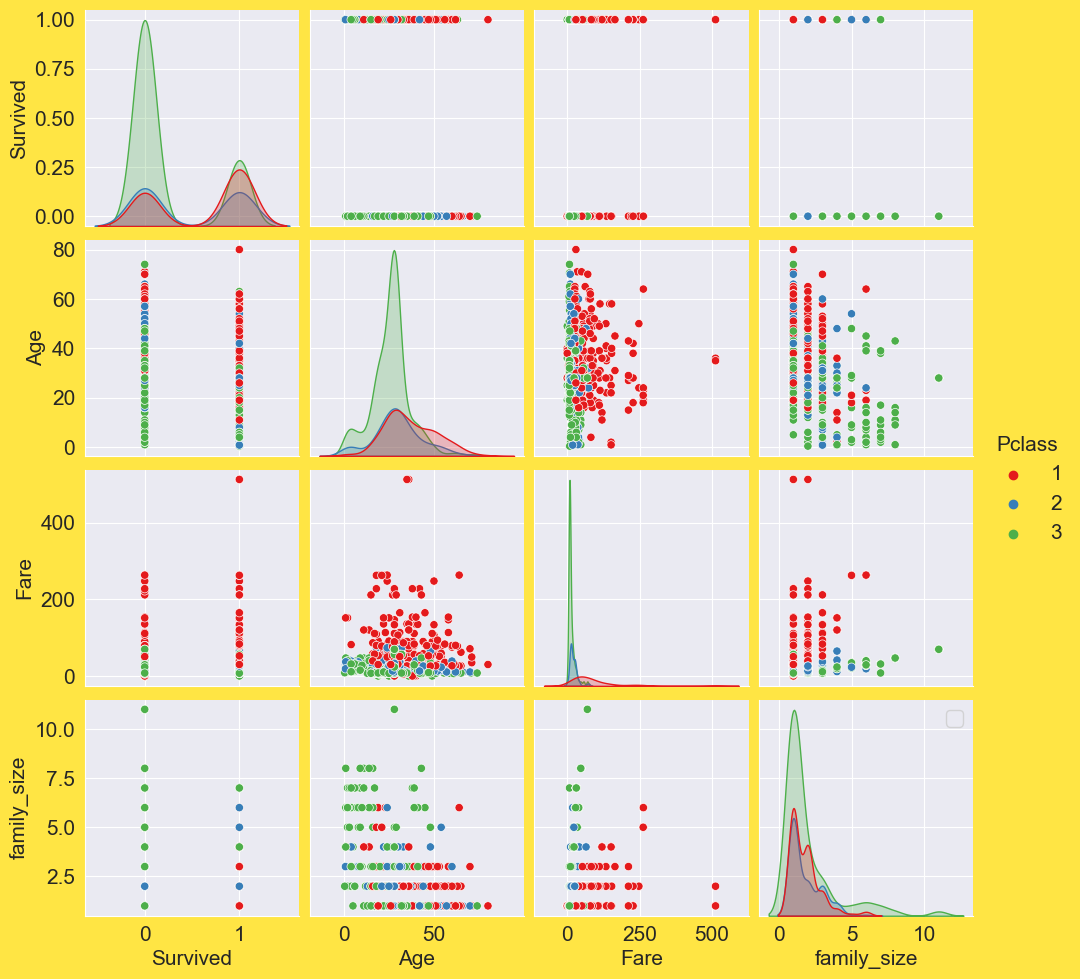

In [40]:
sns.pairplot(data=data, hue='Pclass', palette='Set1')
plt.legend()
plt.show()

* By analyzing the plots, you can observe how these variables are related to each other and potentially have sort of linear pattern


# Correlation with Target Variables Survived

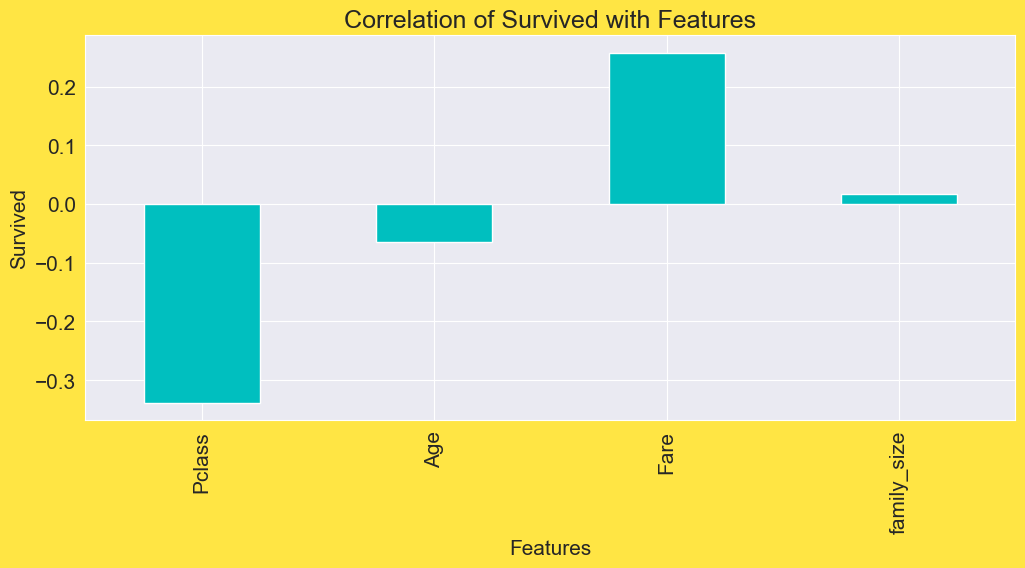

In [41]:

plt.figure(figsize = (12,5))
data.corr()['Survived'].drop(['Survived']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Survived',fontsize=15)
plt.title('Correlation of Survived with Features',fontsize = 18)
plt.show()

# Outlier Detection and Removel

In [42]:
# As we have lot of Columns Lets sort Columns by their datatype
data.columns.to_series().groupby(data.dtypes).groups


{int64: ['Survived', 'Pclass', 'family_size'], float64: ['Age', 'Fare'], object: ['Sex', 'Embarked', 'family_type']}

In [43]:
num_cols= ['Survived', 'Pclass', 'family_size','Age', 'Fare']
cat_cols= ['Sex', 'Embarked', 'family_type']

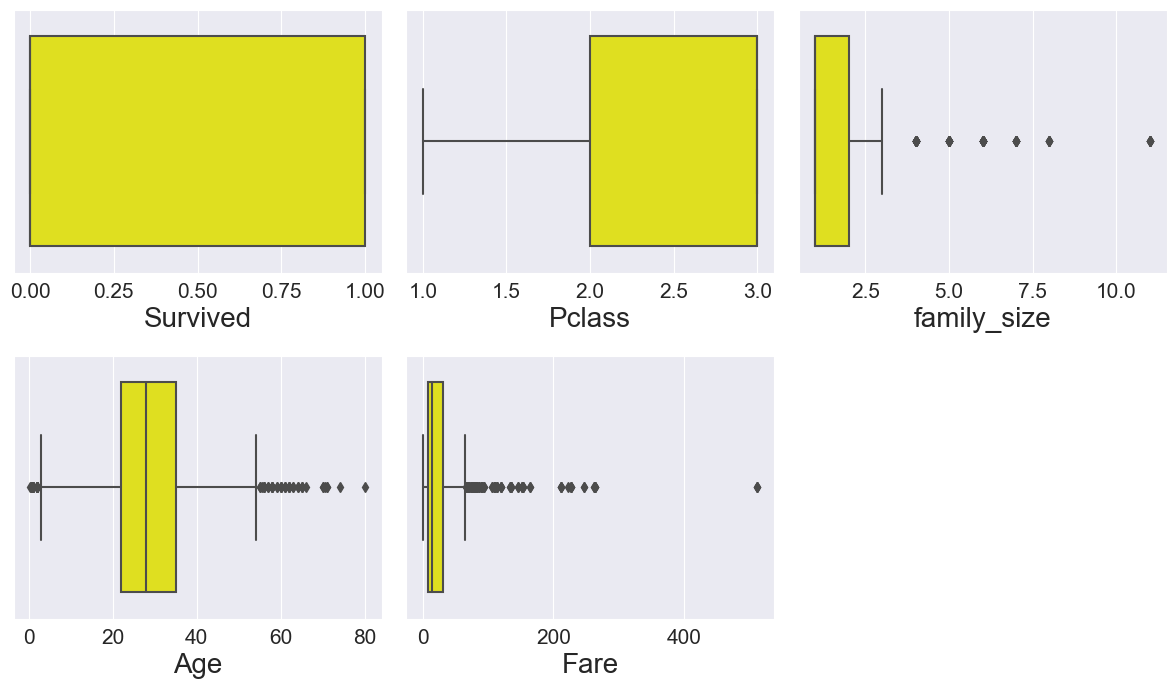

In [45]:
# Identifying the outliers using boxplot in train dataset
plt.figure(figsize=(12,10),facecolor='white')
plotnumber=1
for i in num_cols:
    if plotnumber<=10:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(data[i],color='yellow')
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.tight_layout()

#### We can see that continous features like age & fare contains outliers.

In [46]:
# Outlier detection 

def detect_outliers(df,n,features):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than n outliers according
    to the Tukey method.
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers   

In [47]:
# detect outliers from Age, SibSp , Parch and Fare
from collections import Counter
Outliers_to_drop = detect_outliers(data,2,["Age","family_size","Fare"])

In [49]:
# Drop outliers
data = data.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)

In [50]:
data.shape

(888, 8)

## Encoding Categorical Features

In [51]:
# Using Label encoder for transforming Categorical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in cat_cols:
    data[i] = le.fit_transform(data[i])
data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,family_size,family_type
0,0,3,1,22.0,7.2500,2,2,2
1,1,1,0,38.0,71.2833,0,2,2
2,1,3,0,26.0,7.9250,2,1,0
3,1,1,0,35.0,53.1000,2,2,2
4,0,3,1,35.0,8.0500,2,1,0


## Standard Scaler

In [53]:
# Splitting data in target and dependent feature
X = data.drop(['Survived'], axis =1)
Y = data['Survived']

In [54]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

# Machine Learning Model Building

In [56]:
#Importing Machine learning Model library
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [58]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=64, test_size=.25)

# Finding best Random state

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(50,300):
    X_train,X_test,Y_train,Y_test = train_test_split(X_scale,Y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.8539325842696629 on Random_state 147


# LogisticRegression

In [60]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=147, test_size=.25)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.8513513513513513


Confusion matrix of Logistics Regression : 
 [[126  12]
 [ 21  63]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.86      0.91      0.88       138
           1       0.84      0.75      0.79        84

    accuracy                           0.85       222
   macro avg       0.85      0.83      0.84       222
weighted avg       0.85      0.85      0.85       222



In [61]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(log_reg, X_scale, Y, cv =5)
print('\033[1m'+'Cross Validation Score', log_reg, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score LogisticRegression() :

CVScore : [0.78089888 0.80898876 0.79213483 0.79096045 0.81920904]
Mean CV Score : 0.7984383926871071
Std deviation : 0.01375513881885909


#  Decision Tree Classifier

In [62]:
dtc=DecisionTreeClassifier()
dtc.fit(X_train,Y_train)
y_pred=dtc.predict(X_test)
print('\033[1m'+'Decision Tree Classifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Decision Tree Classifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Decision Tree Classifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Decision Tree Classifier'+'\033[0m \n',classification_report(Y_test, y_pred))

Decision Tree Classifier Evaluation


Accuracy Score of Decision Tree Classifier : 0.7837837837837838


Confusion matrix of Decision Tree Classifier : 
 [[110  28]
 [ 20  64]]


classification Report of Decision Tree Classifier 
               precision    recall  f1-score   support

           0       0.85      0.80      0.82       138
           1       0.70      0.76      0.73        84

    accuracy                           0.78       222
   macro avg       0.77      0.78      0.77       222
weighted avg       0.79      0.78      0.79       222



In [64]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(dtc, X_scale, Y, cv =5)
print('\033[1m'+'Cross Validation Score', log_reg, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score LogisticRegression() :

CVScore : [0.79213483 0.78089888 0.8258427  0.76836158 0.80225989]
Mean CV Score : 0.7938995746841871
Std deviation : 0.019568236560759726


# Random Forest Classifier

In [65]:
rfc=RandomForestClassifier()
rfc.fit(X_train,Y_train)
y_pred=rfc.predict(X_test)
print('\033[1m'+'Random Forest Classifier'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Random Forest Classifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Random Forest Classifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Random Forest Classifier'+'\033[0m \n',classification_report(Y_test, y_pred))

Random Forest Classifier


Accuracy Score of Random Forest Classifier : 0.8513513513513513


Confusion matrix of Random Forest Classifier : 
 [[123  15]
 [ 18  66]]


classification Report of Random Forest Classifier 
               precision    recall  f1-score   support

           0       0.87      0.89      0.88       138
           1       0.81      0.79      0.80        84

    accuracy                           0.85       222
   macro avg       0.84      0.84      0.84       222
weighted avg       0.85      0.85      0.85       222



In [66]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(rfc, X_scale, Y, cv =5)
print('\033[1m'+'Cross Validation Score', rfc, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score RandomForestClassifier() :

CVScore : [0.79213483 0.79213483 0.84269663 0.7740113  0.83615819]
Mean CV Score : 0.807427156732051
Std deviation : 0.027032343683769278


# AdaBoost Classifier

In [67]:
adbc=AdaBoostClassifier()
adbc.fit(X_train,Y_train)
y_pred=adbc.predict(X_test)
print('\033[1m'+'AdaBoost Classifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of AdaBoost Classifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of AdaBoost Classifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of AdaBoost Classifier'+'\033[0m \n',classification_report(Y_test, y_pred))

AdaBoost Classifier Evaluation


Accuracy Score of AdaBoost Classifier : 0.8648648648648649


Confusion matrix of AdaBoost Classifier : 
 [[129   9]
 [ 21  63]]


classification Report of AdaBoost Classifier 
               precision    recall  f1-score   support

           0       0.86      0.93      0.90       138
           1       0.88      0.75      0.81        84

    accuracy                           0.86       222
   macro avg       0.87      0.84      0.85       222
weighted avg       0.87      0.86      0.86       222



In [68]:

from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(adbc, X_scale, Y, cv =5)
print('\033[1m'+'Cross Validation Score',adbc, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score AdaBoostClassifier() :

CVScore : [0.75842697 0.82022472 0.80898876 0.81355932 0.83615819]
Mean CV Score : 0.8074715927124994
Std deviation : 0.026192750349697397


# GradientBoostingClassifier

In [81]:
grad_bc=GradientBoostingClassifier()
grad_bc.fit(X_train,Y_train)
y_pred=grad_bc.predict(X_test)
print('\033[1m'+'Gradient Boosting Classifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Gradient Boosting Classifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Gradient Boosting Classifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Gradient Boosting Classifier'+'\033[0m \n',classification_report(Y_test, y_pred))

Gradient Boosting Classifier Evaluation


Accuracy Score of Gradient Boosting Classifier : 0.8918918918918919


Confusion matrix of Gradient Boosting Classifier : 
 [[130   8]
 [ 16  68]]


classification Report of Gradient Boosting Classifier 
               precision    recall  f1-score   support

           0       0.89      0.94      0.92       138
           1       0.89      0.81      0.85        84

    accuracy                           0.89       222
   macro avg       0.89      0.88      0.88       222
weighted avg       0.89      0.89      0.89       222



In [82]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(grad_bc, X_scale, Y, cv =5)
print('\033[1m'+'Cross Validation Score', grad_bc, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score GradientBoostingClassifier() :

CVScore : [0.80898876 0.83146067 0.83707865 0.81920904 0.85310734]
Mean CV Score : 0.8299688948136863
Std deviation : 0.015126812491907038


# Hyper Parameter Tuning : GridSearchCV

In [83]:
from sklearn.model_selection import GridSearchCV

In [84]:
parameter = param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 4, 5]
}

In [85]:
GCV = GridSearchCV(GradientBoostingClassifier(),parameter,verbose=5)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5] END learning_rate=0.1, max_depth=3, n_estimators=100;, score=0.828 total time=   0.0s
[CV 2/5] END learning_rate=0.1, max_depth=3, n_estimators=100;, score=0.805 total time=   0.0s
[CV 3/5] END learning_rate=0.1, max_depth=3, n_estimators=100;, score=0.744 total time=   0.0s
[CV 4/5] END learning_rate=0.1, max_depth=3, n_estimators=100;, score=0.827 total time=   0.0s
[CV 5/5] END learning_rate=0.1, max_depth=3, n_estimators=100;, score=0.850 total time=   0.0s
[CV 1/5] END learning_rate=0.1, max_depth=3, n_estimators=200;, score=0.799 total time=   0.0s
[CV 2/5] END learning_rate=0.1, max_depth=3, n_estimators=200;, score=0.797 total time=   0.0s
[CV 3/5] END learning_rate=0.1, max_depth=3, n_estimators=200;, score=0.752 total time=   0.0s
[CV 4/5] END learning_rate=0.1, max_depth=3, n_estimators=200;, score=0.820 total time=   0.0s
[CV 5/5] END learning_rate=0.1, max_depth=3, n_estimators=200;, score=0.812 total t

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.05, 0.01],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300]},
             verbose=5)

In [86]:
GCV.best_params_

{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 300}

In [89]:
Final_mod = GradientBoostingClassifier(learning_rate= 0.01, max_depth= 5, n_estimators =300)
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\033[1m'+'Final Random Forest Classifier Model'+'\033[0m')
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Random Forest Classifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'Classification Report of Random Forest Classifier'+'\033[0m \n',classification_report(Y_test, y_pred))

Final Random Forest Classifier Model
Accuracy Score :
 0.8828828828828829


Confusion matrix of Random Forest Classifier : 
 [[130   8]
 [ 18  66]]


Classification Report of Random Forest Classifier 
               precision    recall  f1-score   support

           0       0.88      0.94      0.91       138
           1       0.89      0.79      0.84        84

    accuracy                           0.88       222
   macro avg       0.89      0.86      0.87       222
weighted avg       0.88      0.88      0.88       222



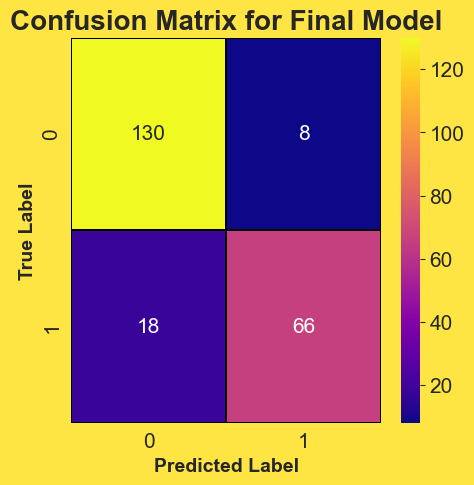

In [91]:
# confusion metrix 

# Lets plot confusion matrix for  FinalModel
Matrix = confusion_matrix(Y_test, y_pred)



fig , ax = plt.subplots(figsize=(5,5))
sns.heatmap(Matrix, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, 
            cmap="plasma")

plt.xlabel("Predicted Label",fontsize=14,fontweight='bold')
plt.ylabel("True Label",fontsize=14,fontweight='bold')
plt.title('Confusion Matrix for Final Model',fontsize=20,fontweight='bold')
plt.show()

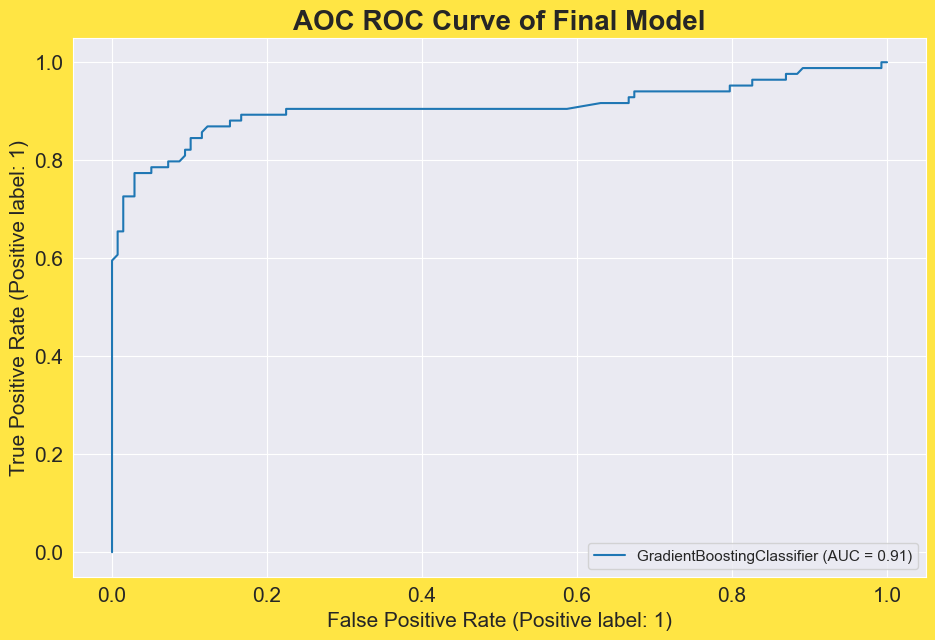

Auc Score :
 0.863871635610766


In [92]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve
disp = plot_roc_curve(Final_mod,X_test,Y_test)   
plt.legend(prop={'size':11}, loc='lower right')
plt.title('AOC ROC Curve of Final Model',fontsize=20,fontweight='bold')
plt.show()
auc_score = roc_auc_score(Y_test, Final_mod.predict(X_test))
print('\033[1m'+'Auc Score :'+'\033[0m\n',auc_score)

#  Saving the model 

In [94]:
import joblib
joblib.dump(Final_mod,'Titanic_Survival_Project.pkl')

['Titanic_Survival_Project.pkl']

# Predicting the Final Model

In [95]:
# Prediction
prediction = Final_mod.predict(X_test)
Actual = np.array(Y_test)
df_Pred = pd.DataFrame()
df_Pred["Predicted Values"] = prediction
df_Pred["Actual Values"] = Actual
df_Pred.head()

,Predicted Values,Actual Values
0,1,1
1,1,1
2,0,0
3,0,0
4,1,1
